In [84]:
#!/usr/bin/env python3

# read text files

import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import signal, fftpack
from scipy.signal import savgol_filter
%matplotlib inline

# enter data file here
data_files = ['data_file_x-axis_1','data_file_x-axis_2','data_file_x-axis_3','data_file_y-axis_1','data_file_z-axis_1']


path = '/home/elenakern/Codes/sai2.0/applications/data_collection/find_IMU_frame/frame_calibration_data/'

path_data_files=[]

for file in data_files:
    path_data_files.append(path + file)
    
file_x_1 = np.loadtxt(path_data_files[0],skiprows=1)
file_x_2 = np.loadtxt(path_data_files[1],skiprows=1)
file_x_3 = np.loadtxt(path_data_files[2],skiprows=1)
file_y_1 = np.loadtxt(path_data_files[3],skiprows=1)
file_z_1 = np.loadtxt(path_data_files[4],skiprows=1)

a_x_1 = file_x_1[0::,0:3]
a_x_1 *=9.81
g_x_1 = file_x_1[0::,3:6]
time_x_1 = time = np.arange(np.size(a_x_1[:,0]))

a_x_2 = file_x_2[0::,0:3]
a_x_2 *=9.81
g_x_2 = file_x_2[0::,3:6]
time_x_2 = time = np.arange(np.size(a_x_2[:,0]))

a_x_3 = file_x_3[0::,0:3]
a_x_3 *=9.81
g_x_3 = file_x_3[0::,3:6]
time_x_3 = time = np.arange(np.size(a_x_3[:,0]))

a_y_1 = file_y_1[0::,0:3]

a_y_1 *=9.81
g_y_1 = file_y_1[0::,3:6]

time_y_1 = time = np.arange(np.size(a_y_1[:,0]))

a_z_1 = file_z_1[0::,0:3]
a_z_1 *=9.81
g_z_1 = file_z_1[0::,3:6]
time_z_1 = time = np.arange(np.size(a_z_1[:,0]))

acc=[]
acc.append(a_x_1)
acc.append(a_x_2)
acc.append(a_x_3)

acc = np.concatenate(acc)

    

In [85]:
print(a_x_1.shape)
print(g_x_1.shape)
print(time_x_1.shape)
print(acc.shape)

(10047, 3)
(10047, 3)
(10047,)
(33190, 3)


In [58]:
#TUM colors rgb
blue = (0,0.3961,0.7412)
red = (0.7686,0.0275,0.1059)
green =(0,0.4863,0.1882)
orange =  (0.8902, 0.4471, 0.1333)
purple = (0.4118, 0.0314, 0.3529)
grey = (0.6118, 0.6157, 0.6235)
yellow = (0.9765, 0.7294, 0)

In [78]:
def PlotCompare(counter, time, x_1, x_2, y_1, y_2, z_1, z_2, title_1, title_2, title_3, label_1, label_2, ylabel, title):
    plt.figure(counter, figsize=(8,8))
    plt.title(title)
    plt.subplot(311)
    plt.tight_layout()
    plt.plot(time, x_1, c=blue, label= label_1)
    plt.plot(time, x_2, c=red, label= label_2)
    plt.title(title_1)
    plt.legend()
    plt.xlabel("Elapsed time in $s$")
    plt.ylabel(ylabel)
    plt.subplot(312)
    plt.tight_layout()
    plt.plot(time, y_1, c=blue, label= label_1)
    plt.plot(time, y_2, c=red, label= label_2)
    plt.ylabel(ylabel)
    plt.title(title_2)
    plt.legend()
    plt.xlabel("Elapsed time in $s$")
    plt.subplot(313)
    plt.tight_layout()
    plt.plot(time, z_1, c=blue, label= label_1)
    plt.plot(time, z_2, c=red, label= label_2)
    plt.ylabel(ylabel)
    plt.xlabel("Elapsed time in $s$")
    plt.title(title_3)
    plt.legend()



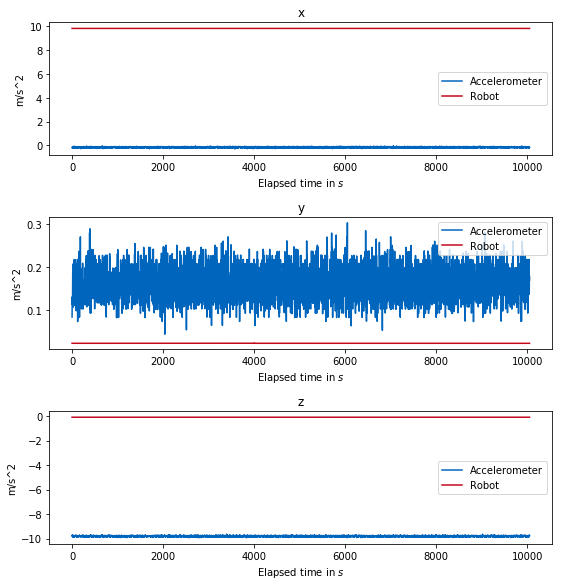

In [79]:
PlotCompare(1, time_x_1, a_x_1[:,0], g_x_1[:,0],a_x_1[:,1], g_x_1[:,1], a_x_1[:,2], g_x_1[:,2], "x", "y", "z", "Accelerometer", "Robot", "m/s^2", "x-Axis first meas")

In [94]:
mean_accelerometer =[]
mean_model =[]
for i in range(3):
    mean_accelerometer.append(np.mean(a_x_1[:,i]))
    mean_model.append(np.mean(g_x_1[:,i]))
    
print("mean accelerometer: {}".format(mean_accelerometer))    
print("mean model: {}".format(mean_model))

mean accelerometer: [-0.15420008094356524, 0.1624841304150493, -9.797149580558376]
mean model: [9.809590298596596, 0.023193195759928335, -0.08610573721508907]


In [95]:
mean_accelerometer =[]
mean_model =[]
for i in range(3):
    mean_accelerometer.append(np.mean(a_x_2[:,i]))
    mean_model.append(np.mean(g_x_2[:,i]))
    
print("mean accelerometer: {}".format(mean_accelerometer))    
print("mean model: {}".format(mean_model))

mean accelerometer: [-0.10577004434893464, 0.11961615097796394, -9.799808892844656]
mean model: [9.809889999999998, -0.017086360617373886, -0.04394833228920051]


In [97]:
mean_accelerometer =[]
mean_model =[]
for i in range(3):
    mean_accelerometer.append(np.mean(a_x_3[:,i]))
    mean_model.append(np.mean(g_x_3[:,i]))
    
print("mean accelerometer: {}".format(mean_accelerometer))    
print("mean model: {}".format(mean_model))

mean accelerometer: [-0.12320294621577173, 0.09991436034701093, -9.798565910576434]
mean model: [9.809979999999998, 0.0009297308241920895, -0.02056181045144314]


In [99]:
mean_accelerometer =[]
mean_model =[]
for i in range(3):
    mean_accelerometer.append(np.mean(a_y_1[:,i]))
    mean_model.append(np.mean(g_y_1[:,i]))
    
print("mean accelerometer: {}".format(mean_accelerometer))    
print("mean model: {}".format(mean_model))

mean accelerometer: [-9.461226971835073, -0.08105396675737275, 0.22515004444574904]
mean model: [0.02899410750051799, 9.80968998066165, 0.07297293209475793]


In [100]:
mean_accelerometer =[]
mean_model =[]
for i in range(3):
    mean_accelerometer.append(np.mean(a_z_1[:,i]))
    mean_model.append(np.mean(g_z_1[:,i]))
    
print("mean accelerometer: {}".format(mean_accelerometer))    
print("mean model: {}".format(mean_model))

mean accelerometer: [0.06402673459545327, -9.889831465327592, 0.19521932275204745]
mean model: [-0.006447065914995764, -0.04232729319401299, 9.809910000000002]
